In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

#### Check out the data

In [17]:
student_data = pd.read_csv('student-all.csv')

##### Understand the data

In [18]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,transition
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,fail
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,fail


In [19]:
student_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'transition'],
      dtype='object')

In [20]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [22]:
student_data.drop_duplicates()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,transition
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,fail
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,fail
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,pass
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,fail
1042,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,fail


In [23]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [78]:
X = student_data[['age', 'sex', 'Pstatus', 'famsize', 'Medu', 'Fedu', 'studytime', 'famsup', 'famrel', 'paid','goout', 'activities' ]]
y = student_data[['Dalc', 'Walc', 'absences', 'higher', 'health','failures']]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train


,age,sex,Pstatus,famsize,Medu,Fedu,studytime,famsup,famrel,paid,goout,activities
929,16,M,T,LE3,4,4,1,yes,4,no,2,no
7,17,F,A,GT3,4,4,2,yes,4,no,4,no
904,16,F,T,LE3,1,1,2,yes,5,no,2,no
595,16,M,T,GT3,1,2,1,yes,3,no,3,yes
14,15,M,A,GT3,2,2,3,yes,4,no,2,no
...,...,...,...,...,...,...,...,...,...,...,...,...
561,19,M,T,GT3,3,2,1,yes,4,no,4,no
967,16,F,A,GT3,3,2,2,yes,2,no,5,yes
312,19,M,T,GT3,1,2,2,no,4,no,2,no
680,16,M,T,GT3,2,1,1,no,3,no,2,yes


<Axes: ylabel='Count'>

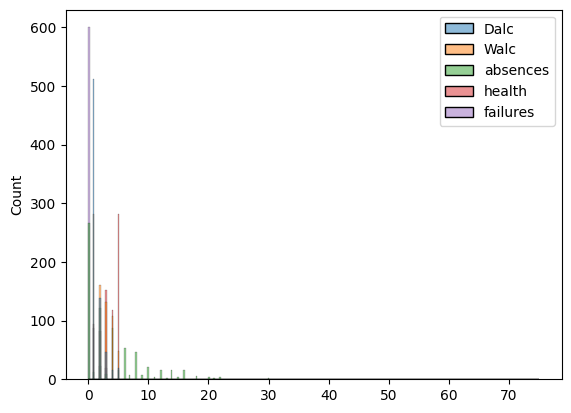

In [72]:
sns.histplot(y_train)


<Axes: ylabel='Count'>

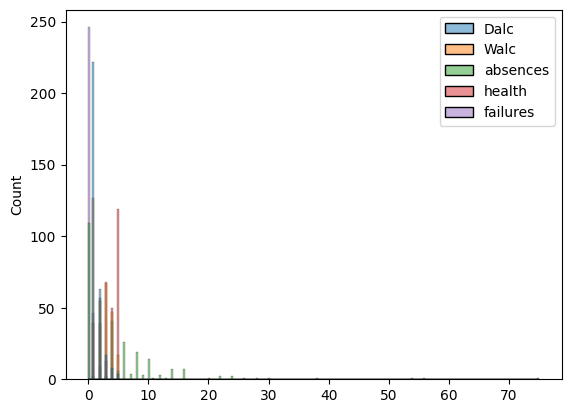

In [35]:
sns.histplot(y_test)

In [80]:
''' decision tree '''
clf = DecisionTreeClassifier(random_state=2021)


In [81]:
X_train = X_train.drop(['sex','Pstatus', 'famsize', 'famsup','paid','activities'],axis=1)
X_test = X_test.drop(['sex','Pstatus', 'famsize', 'famsup','paid','activities'],axis=1)
y_train = y_train.drop(['higher'],axis=1)
y_test = y_test.drop(['higher'],axis=1)

clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2021)

In [75]:
y_test

,Dalc,Walc,absences,health,failures
1030,2,3,10,1,0
761,1,1,0,5,0
137,1,1,0,5,2
1001,3,1,0,5,0
672,1,2,4,5,0
...,...,...,...,...,...
63,2,4,2,4,0
794,2,3,4,1,0
507,1,1,12,5,1
537,4,5,2,4,0


In [82]:
pred = clf.predict(X_test)
pred

array([[ 2,  5,  4,  5,  1],
       [ 3,  4,  0,  5,  0],
       [ 3,  5,  0,  5,  0],
       ...,
       [ 1,  1, 10,  3,  0],
       [ 2,  5,  8,  4,  0],
       [ 1,  4,  6,  3,  0]])

In [84]:
accuracy = accuracy_score(y_test, pred)
print(f'accuracy: {accuracy:.2f}')


ValueError: multiclass-multioutput is not supported